In [7]:
#import library
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import file
file = 'blues_00.wav'

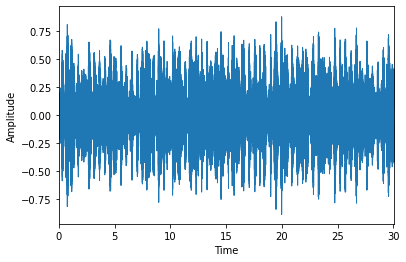

In [6]:
#wavefrom

signal, sr = librosa.load(file,sr=22050) # sr * T = 22050*30
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Text(0, 0.5, 'Magnitude')

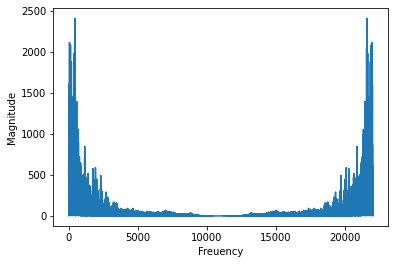

In [9]:
#ffr -> spectrum

fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))
plt.plot(frequency,magnitude)
plt.xlabel("Freuency")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

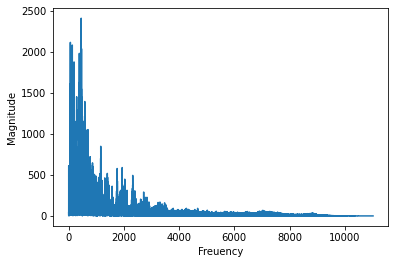

In [13]:
#since the graph is symmetric, half of the graph is enough for analysis
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Freuency")
plt.ylabel("Magnitude")

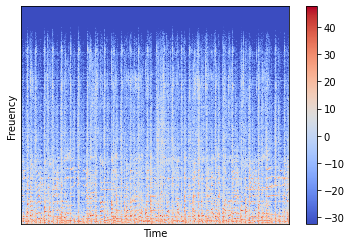

In [16]:
#stft -> spectogram

#number of samples in fft
n_fft = 2048 
#amount we are shifting each fourier transform to the right
hop_length = 512

stft = librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)

spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)

librosa.display.specshow(log_spectogram,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Freuency")
plt.colorbar()
plt.show()

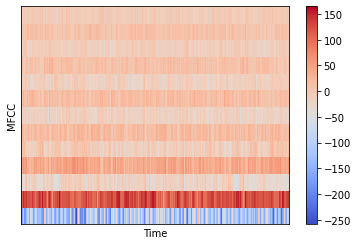

In [17]:
#MFCC

MFCC = librosa.feature.mfcc(
         signal,
         n_fft=n_fft,
         hop_length=hop_length,
         n_mfcc=13)

librosa.display.specshow(MFCC,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()